In [51]:
'''Company invested some dollars for the sale of the product in different adverstising mediums. Sales is the increase in overall revenue. 
Predict the sales depending on which differnt mediums we get good revenue'''

'Company invested some dollars for the sale of the product in different adverstising mediums. Sales is the increase in overall revenue. \nPredict the sales depending on which differnt mediums we get good revenue'

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data=pd.read_csv(r"C:\Python Imarticus\Basics\Linear Regression\Advertising.csv",index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [54]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(200, 4)
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


### Assumption 1 :There should be no outliers in the data (check for all independent var and dependant var)

'\nAssumption Handling:\nIf there are one or two outliers then u can ignore/eliminate them(ask the client).\nFor cluster of points(when it is near/away to upper whisker) u can drop them and go ahead if u have more no. of records.\nor else if the range of data is cut down then u need to allow them. Think logically and then take action by asking client.\n\nIf there are monetary values (eg salaries of trainers/managers and ceo etc) then leave them after confirmation form client.\n\nOther appraoch is to treat them by capping(bringing them to upper and lower whisker) or\nmeasure of central tendency approach(bringing them to median value). This is done by taking the outlilers \ninto new df and treat them by any of the methods and concat with acceptable range df which leads to imputed df\n\nAbove elimination and treating approaches can be followed in the similar for dependent var also.'

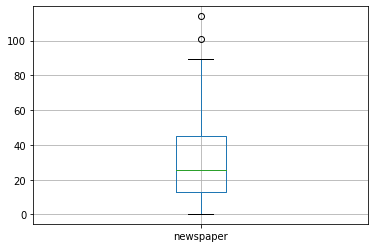

In [55]:
data.boxplot("newspaper") #here there are real values so we can ignore them

'''
Assumption Handling:
If there are one or two outliers then u can ignore/eliminate them(ask the client).
For cluster of points(when it is near/away to upper whisker) u can drop them and go ahead if u have more no. of records.
or else if the range of data is cut down then u need to allow them. Think logically and then take action by asking client.

If there are monetary values (eg salaries of trainers/managers and ceo etc) then leave them after confirmation form client.

Other appraoch is to treat them by capping(bringing them to upper and lower whisker) or
measure of central tendency approach(bringing them to median value). This is done by taking the outlilers 
into new df and treat them by any of the methods and concat with acceptable range df which leads to imputed df

Above elimination and treating approaches can be followed in the similar for dependent var also.'''

### Assumption2: Assumption of Linearity:Every independent var should have a linear relationship with the dependent var


'Assumption Handling:\n   For TV: strong positive relationship\n   For radio: moderately positive relationship\n   For newspaper: no relationship as we see scattered points. Hence we drop such var as there is no linear relationship. \n   If we keep it we get weak model. But as there are limited indpendent vars we keep this and proceed as of now. \n   If there are more ind vars we can drop such vars'

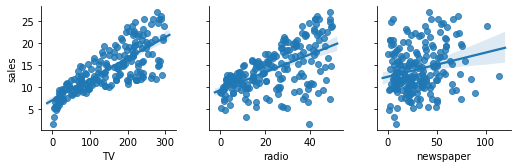

In [56]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"] #x_vars=data[:-1]
             ,y_vars="sales",kind='reg') #here newspaper is not having relationship

'''Assumption Handling:
   For TV: strong positive relationship
   For radio: moderately positive relationship
   For newspaper: no relationship as we see scattered points. Hence we drop such var as there is no linear relationship. 
   If we keep it we get weak model. But as there are limited indpendent vars we keep this and proceed as of now. 
   If there are more ind vars we can drop such vars'''

In [57]:
#Subset from df to create ind and dep vars
X=data[['TV','radio','newspaper']]
Y=data['sales']

### Assumption3: Assumption of Normality: Dep var should follow an approximate normal distribution

'Assumption Handling:\n   If we get right or left skewed plot, then tranform data by 2 types.\n   Log tranformation (mostly prefered) : if we have  peaks in data then this smoothen the peaks\n   Square Root Tranformation : if we have  peaks in data then this again gives the peaks with same sharpness by smaller values (eg: sqrt 4 is 2)'

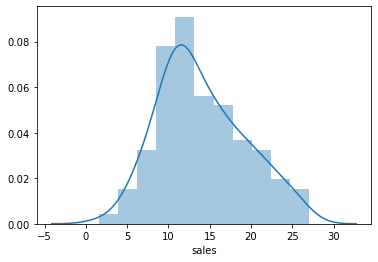

In [58]:
sns.distplot(Y,hist=True) #here we get app normal distn

'''Assumption Handling:
   If we get right or left skewed plot, then tranform data by 2 types.
   Log tranformation (mostly prefered) : if we have  peaks in data then this smoothen the peaks
   Square Root Tranformation : if we have  peaks in data then this again gives the peaks with same sharpness by smaller values (eg: sqrt 4 is 2)'''

In [59]:
'''Log tranformation
Y_log=np.log(Y)
sns.distplot(Y_log,hist=True) #to check the distn again'''


'Log tranformation\nY_log=np.log(Y)\nsns.distplot(Y_log,hist=True) #to check the distn again'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D022A7D208>,
      dtype=object)

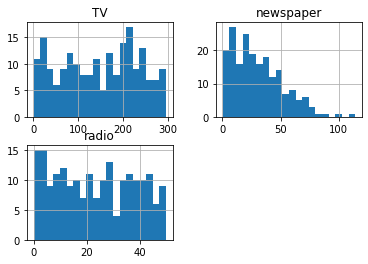

In [60]:
'''Good practice to ensure indp vars data is not highly skewed'''

X.hist(bins=20) #newspaper has right skewed data. We can do log tranformation here

In [61]:
#Generic code for log transformation, checks for all indpendent vars skewness

from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna())) #to drop missing values in var and find the skewness values of each var
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)] #to consider the highly skewed vars (>0.75 or <-0.75)

print(data_num_skew)
print(data_num_skewed)

#data_num_skewed.index as the indexes here as var names.
#log1p(log+1 tranformation) is used to handle the 0 values as log(0) is -infinity
import numpy as np
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])  


TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\Neeharika\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D023ED78C8>,
      dtype=object)

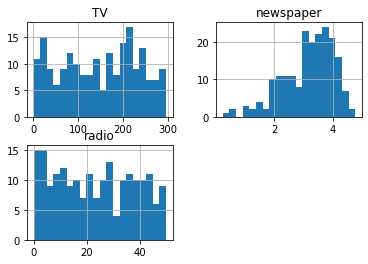

In [62]:
X.hist(bins=20)

In [63]:
'''
Model Nomenclature:
   log-log- Y,X both are tranformed
   log-level-Y is,X is not
   level-log-Y is not X is
   level-level- Y,X both are not tranformed'''

'\nModel Nomenclature:\n   log-log- Y,X both are tranformed\n   log-level-Y is,X is not\n   level-log-Y is not X is\n   level-level- Y,X both are not tranformed'

### Assumption4 : There should be no multicollinearity in the data(among independent vars)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


'Assumption Handling:\n   values >0.7 or <-0.7 we eliminate one of the var among the 2 vars. \n   To do this decide on 2 points: \n   1. Out of the 2 which one should eliminate logically\n   2. Out of 2 which var has correaltion with high no. of other vars we need to drop the higher one'

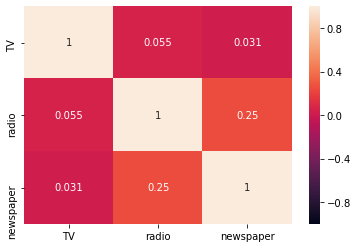

In [64]:
#Can be checked by 2 appraches
#Approach1: Correaltion Matrix 

corr_df=X.corr(method='pearson')
print(corr_df)

#Data Visualization using heatmap: vmax and vmin to create the color scheme/range

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

'''Assumption Handling:
   values >0.7 or <-0.7 we eliminate one of the var among the 2 vars. 
   To do this decide on 2 points: 
   1. Out of the 2 which one should eliminate logically
   2. Out of 2 which var has correaltion with high no. of other vars we need to drop the higher one'''

In [65]:
#Appraoch2: Variation Inflation Factor 

'''Vif function runs multiple models among the ind vars. 
Each iteration one var is taken as dep and others as ind. Model is built and R2(for model) and VIF(for dep var)  is calculated. 
For no multicollinearity the dep var taken shouldnt be predicted based on ind vars. Hence R2 and VIF should be low.
Such var is taken and others would be having multicollinearity. VIF <=5 is the limit and rest vars are to be excluded.

When we have such multiple ind vars we see which var vif is high among them (where vif>5) we eliminate highest 
and run vif fucntion again.Then check for next one and so on. Never eliminate all the vars at once.

But we need to take care and eliminate vars depending on domain knowledge though we have vif high for such important vars.'''

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] #list comprehension
vif_df.round(2)



,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [66]:
'''here newspaper can be eliminated as vif >5. this is the ideal thing we need to drop and re-run the vif and build model.
If logicaaly the var is correct even though vif>5 we need to keep them, its then we can come to know that LR doesnt work. We can
now switch algorithm and used DT/SVM/KNN to get better results.

X.drop('newspaper',axis=1,inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)'''

'here newspaper can be eliminated as vif >5. this is the ideal thing we need to drop and re-run the vif and build model.\nIf logicaaly the var is correct even though vif>5 we need to keep them, its then we can come to know that LR doesnt work. We can\nnow switch algorithm and used DT/SVM/KNN to get better results.\n\nX.drop(\'newspaper\',axis=1,inplace=True)\n\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor as vif\nvif_df = pd.DataFrame()\nvif_df["features"] = X.columns\nvif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]\nvif_df.round(2)'

### Assumption5 : There should be no auto correlation for linear regression model to work

In [67]:
 '''Durbin-Watson Test- Results of Auto correlation (No correlation between the observations). 
    Value will be in the raing of 0-4. 
    If value close to 2 there is no auto correlation.
    If value close to 4 there is -ve auto correlation.
    If value close to 0 there is +ve auto correlation. 
    We see this result when we perform the model using Stats model library.'''

'Durbin-Watson Test- Results of Auto correlation (No correlation between the observations). \n   Value will be in the raing of 0-4. \n   If value close to 2 there is no auto correlation.\n   If value close to 4 there is -ve auto correlation.\n   If value close to 0 there is +ve auto correlation. \n   We see this result when we perform the model using Stats model library.'

### Appraoch 1 : OLS Method

### Using SKlearn Library- This model dont give statistical value, but we conclude the model  on metrics

### Model Without dropping newspaper- Linear Regression

In [68]:
#Splitting data(random sampling) into Train and test as we have single file. <1000 obs 80-20 or >1000 obs go with 70-30. Default ratio is 75-25

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [69]:
print(X_train.shape)
print()
print(Y_train.shape)
print()
print(X_test.shape)
print()
print(Y_test.shape)

(160, 3)

(160,)

(40, 3)

(40,)


In [70]:
#Model Building process

from sklearn.linear_model import LinearRegression
#create model object
lm=LinearRegression()
#train model object
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#print model attributes intercept(B0) and coefficients(B1,B2,B3 etc)
print(lm.intercept_)
print(lm.coef_)

3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]


In [72]:
#print feature names along with coefficients
print(list(zip(X.columns,lm.coef_)))

'''By investing in TV and radio Sales is increasing, but investing in newspaper Sales is decreasing. Hence a beneficial insight
is its wrong to invest in newspaper'''

[('TV', 0.04374250157742165), ('radio', 0.19303707897345296), ('newspaper', -0.04895136822248785)]


'By investing in TV and radio Sales is increasing, but investing in newspaper Sales is decreasing. Hence a beneficial insight\nis its wrong to invest in newspaper'

In [73]:
#manual approach for predicting on test data
X1=100
X2=100
X3=0  #for X3=100 we got 22.13. Hence above insight is true
Y_pred=3.3532913858151527+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred) #increase in sales when we invest certain amount in TV,radio and newspaper

27.03124938581515


In [74]:
#predict using model on test data

Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [75]:
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual Sales']=Y_test
new_df['Predicted Sales']=Y_pred
new_df

C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


### Model  Evaluation Metrics

In [76]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

'''By r2 we can see linear model is better than mean model. Adjusted r2 is close to r2, so there is no such var which 
is impacting model in bad manner'''

0.834801071903532
2.5929769110930603
0.8322725168816474


'By r2 we can see linear model is better than mean model. Adjusted r2 is close to r2, so there is no such var which \nis impacting model in bad manner'

In [77]:
print(min(Y_test))
print(max(Y_test))

'''As rmse is close to min(Y_test) we can see not a large error. Upto 15% range is acceptable. Ideally the value should
be closer to Y_min '''

1.6
25.5


'As rmse is close to min(Y_test) we can see not a large error. Upto 15% range is acceptable. Ideally the value should\nbe closer to Y_min '

In [78]:
#storing predicted values along with devaition (error value) to file

new_df["Deviation"]=new_df['Actual Sales']-new_df['Predicted Sales']
new_df.to_excel(r"C:\Python Imarticus\Basics\Linear Regression\Sales_Prediction.xlsx",header=True,index=True)
new_df.head()

C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


### Ridge Regression

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [80]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
print(lm.intercept_)
print(lm.coef_)

'''Linear Regression Coefficients: 
3.353291385815151
[ 0.0437425 0.19303708 -0.04895137]'''

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


'Linear Regression Coefficients: \n3.353291385815151\n[ 0.0437425 0.19303708 -0.04895137]'

In [82]:
Y_pred=lm.predict(X_test)

In [83]:
from sklearn.metrics import r2_score,mean_squared_error


r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

'''Linear Regression values:
0.834801071903532
2.59297691109306
0.8322725168816474'''

0.8348082644975934
2.592920462683998
0.832279819566434


'Linear Regression values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474'

### Lasso Regression

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [85]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train,Y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
print(lm.intercept_)
print(lm.coef_)

'''Linear Regression Coefficients: 
3.353291385815151
[ 0.0437425 0.19303708 -0.04895137]

Ridge Regression Coefficients:
3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]'''

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


'Linear Regression Coefficients: \n3.353291385815151\n[ 0.0437425 0.19303708 -0.04895137]\n\nRidge Regression Coefficients:\n3.3522471725966003\n[ 0.04374234  0.19302603 -0.04853131]'

In [87]:
Y_pred=lm.predict(X_test)

In [88]:
from sklearn.metrics import r2_score,mean_squared_error


r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

'''Linear Regression values:
0.834801071903532
2.59297691109306
0.8322725168816474

Ridge Regression values:
0.8348082644975934
2.592920462683998
0.832279819566434 '''

0.8360506658527163
2.5831514271094234
0.8335412372688292


'Linear Regression values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n\nRidge Regression values:\n0.8348082644975934\n2.592920462683998\n0.832279819566434 '

In [89]:
'''Hence as we tried linear,lasso,ridge  where we see the metrics rmse is least and r2 and adjusted r2 is better  
here we consider Lasso as better. we now create new df using these results where we include X_test,Y_test,Y_pred 
,deviation(if necessary) and create an excel file to handover to client '''

'Hence as we tried linear,lasso,ridge  where we see the metrics rmse is least and r2 and adjusted r2 is better  \nhere we consider Lasso as better. we now create new df using these results where we include X_test,Y_test,Y_pred \n,deviation(if necessary) and create an excel file to handover to client '

### Using Stats Model library

In [90]:
new_df=pd.DataFrame()
new_df=X_train

new_df["sales"]=Y_train
new_df.shape

C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(160, 4)

In [91]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

'''Result Inspection based on summary:
 1. Here we generated model and tested on the  same train data. So we get high R2 and adjusted R2 values
 2. Also, p value ( P>|t|) for newspaper is > 0.05 we can say that this var doesnt have significant relationship with sales
    which conclude that we fail to reject null hypothesis. So we can now eliminate this var
 3. Durbin-Watson Test-Here we got near to 2, hence we can conclude no auto correaltion''' 

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           1.10e-85
Time:                        17:17:27   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'Result Inspection based on summary:\n 1. Here we generated model and tested on the  same train data. So we get high R2 and adjusted R2 values\n 2. Also, p value ( P>|t|) for newspaper is > 0.05 we can say that this var doesnt have significant relationship with sales\n    which conclude that we fail to reject null hypothesis. So we can now eliminate this var\n 3. Durbin-Watson Test-Here we got near to 2, hence we can conclude no auto correaltion'

In [92]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348010719035377
2.5929769110930154
0.832272516881653


### Eliminate Newspaper

In [93]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

'''Result Inspection based on summary:
   1. Here Adjusted R2 is more than previous.
   2. AIC and BIC have lowered here than previous
   3. Durbin Watson value is more close to 2 than previous'''

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           3.47e-87
Time:                        17:17:28   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

'Result Inspection based on summary:\n   1. Here Adjusted R2 is more than previous.\n   2. AIC and BIC have lowered here than previous\n   3. Durbin Watson value is more close to 2 than previous'

In [94]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

'''Here all the metrics have improved compared to previous one'''

0.8354496662944217
2.5878817077378105
0.8329310387377037


'Here all the metrics have improved compared to previous one'

### Handling post model building assumptions- Checking using diagnostic plots

### Assumption1: Errors should be random

Text(0, 0.5, 'Residuals')

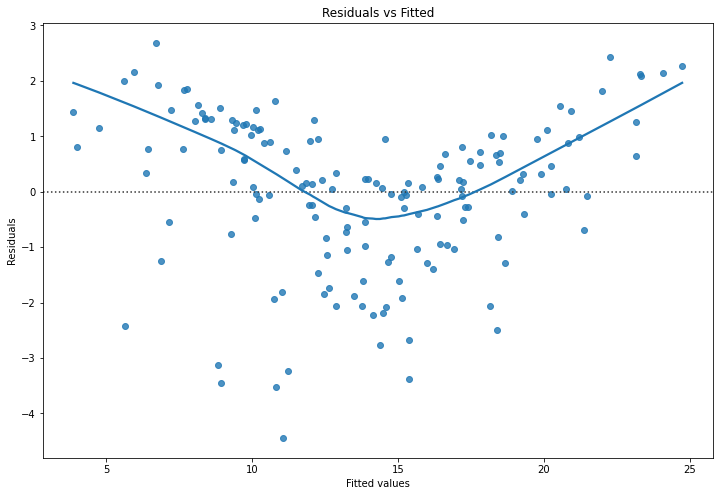

In [95]:
'''Checked using Residuals vs Fitted plot. 
   Interpretation: There should not be any wavy/straight line patterns in graph'''


import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values(predicted values) (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

### Assumption2: Errors should follow normal distribution

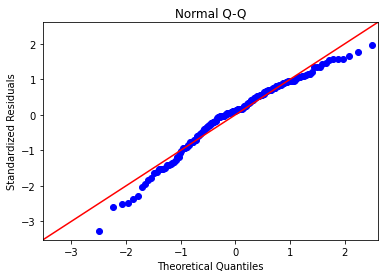

In [96]:
'''Checked using normal Quantile Quantile Plot
   If the data points are following the red diagonal line then they are said to follow the noraml distribution. 
   If not we need to get back to model again'''


res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

### Assumption3: errors should follow constant variance(Homoskedasticity)

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

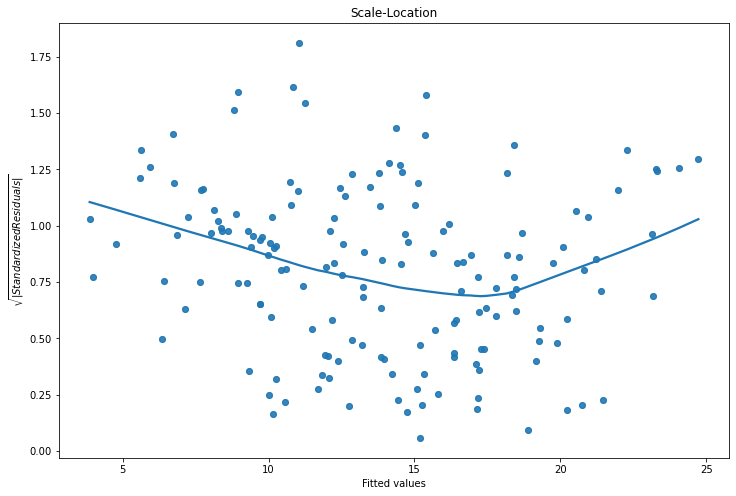

In [97]:
'''checked using scale location plot
  we get same mean and varaince when we divide the plot into scatter regions and they ends up approximately horizintal line. 
  We shouldn't get steep angle (like v shaped)'''

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

'General : In industry we generally build the model using sklearn library intially(only linear reg). \n   In order to conclude on p values and auto corealtion assumption it is good to build model using stats model library. Then it\n   is good to check post model assumptions. If everything goes well conclude on significant vars and \n   again build final model using sklearn library (leads to Lasso when we consider only significant vars(like in this\n   case study as TV and Radio only))'

### Approach 2 : Stochastic gradient descent Method

In [100]:
#Scaling the whole data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

'''fit function will take original data of ind vars get mean and stnd devaitaion of each ind var and stores into scaler object(training part)
   transform function will take original data of ind vars and get mean and stnd devaitaion of each ind var from scalar object
   and transform them into the range using the formula (refer the linear reg doc)'''

X=scaler.fit_transform(X)

#can write fit and transform at once like above or use separately as below
#scaler.fit(X)
#X=scaler.transform(X)

print(X)

[[ 9.69852266e-01  9.81522472e-01  1.27054817e+00]
 [-1.19737623e+00  1.08280781e+00  7.84008452e-01]
 [-1.51615499e+00  1.52846331e+00  1.27219508e+00]
 [ 5.20496822e-02  1.21785493e+00  1.07922051e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.07727442e+00]
 [-1.61540845e+00  1.73103399e+00  1.36239293e+00]
 [-1.04557682e+00  6.43904671e-01  5.26522686e-02]
 [-3.13436589e-01 -2.47406325e-01 -7.16694174e-01]
 [-1.61657614e+00 -1.42906863e+00 -2.84612391e+00]
 [ 6.16042873e-01 -1.39530685e+00 -6.14011337e-02]
 [-9.45155670e-01 -1.17923146e+00  8.52446540e-02]
 [ 7.90028350e-01  4.96973404e-02 -1.78601844e+00]
 [-1.43908760e+00  7.99208859e-01  1.21484164e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.21367806e+00]
 [ 6.66253447e-01  6.50657027e-01  8.06377739e-01]
 [ 5.64664612e-01  1.65000572e+00  9.64860512e-01]
 [-9.25304978e-01  9.00494200e-01  1.84160153e+00]
 [ 1.56887609e+00  1.10306488e+00  1.02549162e+00]
 [-9.08957349e-01 -1.86635121e-01 -2.23359761e-01]
 [ 3.00679600e-03  4.29449843e-

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [103]:
#Build the model

'''learning_rate: alpha: as it should be constant
   eta: alpha(constant) value
   shuffle: default is set to true, once an epoch is done in the next epoch the order of the obs is shuffled.
   random_state: To get everytime same kind of shuffling(above discussed) we used random_state.
   max_iter : max no of epcohs model can perform (1000 times it will iterate through whole data(160 obs here))
   early_stopping: By setting True we specify if zero convergence is reached stop. SGD regressor will automatically consider 10% 
                   train data as validation data to test and find the error values on this data during the iterations.
   n_of_iter_changes: After how many iterations error values are same it should consider as zero convergence'''
   
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",eta0=0.01,shuffle=True,random_state=10,max_iter=1000,
early_stopping=True,n_iter_no_change=5)
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[14.12127235]
[ 3.8052956   2.80435173 -0.02716654]


In [110]:
# to know the model parmaters
print(lm.n_iter_) # no of epochs are used to converge
print(lm.t_) # no of iterations where weights were updated (160*7=1120). At 1121 iteration it reached zero convergence state 

7
1121.0


In [104]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8380570793763203
2.567296453484143
0.8355783612035089


### Finally we can conclude SGD model will be final after comparison of R2,adjusted R2,RMSE in this case study. But as per industry standard Lasso  wins the race

In [ ]:
'''Industry approach: 
   We generally build the model using sklearn library intially(only linear reg). 
   In order to conclude on p values and auto corealtion assumption it is good to build model using stats model library. Then it
   is good to check post model assumptions.If everything goes well conclude on significant vars and 
   again build final model using sklearn library (leads to Lasso when we consider only significant vars(like in this
   case study as TV and Radio only)). 
   
   But SGD is not majorly used as LR has it own reputation and improves using Lasso or Ridge. We switch to another algorithm as
   this is a complex iterative approach.'''